In [1]:
# Setup date and kwargs

class grapeEvents():
    DATAPATH = "C:/Users/sabas/Documents/NJIT/Work/wwv/DATA"

    def __init__(self):

        self.flare23 = {
            'day28': {
                'year': 2023,
                'month': 11,
                'day': 28,
                'filename': f'{self.DATAPATH}/flare_nov_23/2023-11-28T000000Z_N0000020_G1_FN20vr_FRQ_WWV10.csv',
            },

            'day29': {
                'year': 2023,
                'month': 11,
                'day': 29,
                'filename': f'{self.DATAPATH}/flare_nov_23/2023-11-29T000000Z_N0000020_G1_FN20vr_FRQ_WWV10.csv',
            },

            'day30': {
                'year': 2023,
                'month': 11,
                'day': 30,
                'filename': f'{self.DATAPATH}/flare_nov_23/2023-11-30T000000Z_N0000020_G1_FN20vr_FRQ_WWV10.csv',
            },

        }

        self.eclipse24 = {
            'year': 2023,
            'month': 11,
            'day': 28,
            'filename': f'{self.DATAPATH}/tot_eclipse_24/2024-04-08T000000Z_N0000020_G1_FN20vr_FRQ_WWV10.csv',
        }

        self.quietday = {
            'year': 2021,
            'month': 7,
            'day': 1,
            'filename': f'{self.DATAPATH}/NJ_data/wwv_jul_2021/2021-07-01T000000Z_N0000020_G1_FN20vr_FRQ_WWV10.csv',
        }

evs = grapeEvents()

# Select event
date = evs.eclipse24
# date = evs.flare23['day28']
# date = evs.quietday

# Extract date information
year = date.get("year")
month = date.get("month")
day = date.get("day")

# Set plotting options
kwargs = {
    # Grape Parameters
    'mbl' : 5,
    # 'mbl' : 60,
    'filename': date.get("filename"),

    # Plot Parameters
    'val': 'freq',          # Value to plot
    'local': False,         # Toggle local time on x-axis
    'ylim': [-1.25, 1.25],  # Y-axis limits
    'save': True,          # Toggle save figure  

    # What Plots
    'dop': True,            # Plot Doppler Shift
    'sza': True,            # Plot Solar Zenith Angle
    'pwr': False,            # Plot Power

    'SPO' : False,          # Toggle vertical lines for sunrise, sunset, and solar noon
    'end_times': True,      # Toggle RX and TX times for SPO
    'axis2': 'pwr',         # Secondary axis
}

In [2]:
# Get grape for specified date

import grape
g = grape.grapeLoad(year, month, day, **kwargs)

In [3]:
# Get plot parameters for required parameters

valname = kwargs.get('valname', 'f')
minBinLen = kwargs.get('mbl', 5)
ylim = kwargs.get('ylim', None)
fSize = kwargs.get('fsize', 26)


In [4]:
# Create overplot of rt breakdown output from matlab

if False:
    figname = 'FIGURES/rtplot/rtplot'
    # figname = grape.figname(**kwargs)

    g.dopRtPlot(figname, 
                ylim=ylim, 
                fSize=fSize)


In [5]:
# Create reflection point overplot using matlab export

if False:
    figname = 'FIGURES/bounceplot/bounceplot'
    # figname = grape.figname(**kwargs)

    g.rtBouncePlot(figname, 
                ylim=[0, 400], 
                fSize=fSize)



Resolving Hours:



100%|██████████| 25/25 [00:15<00:00,  1.61it/s]


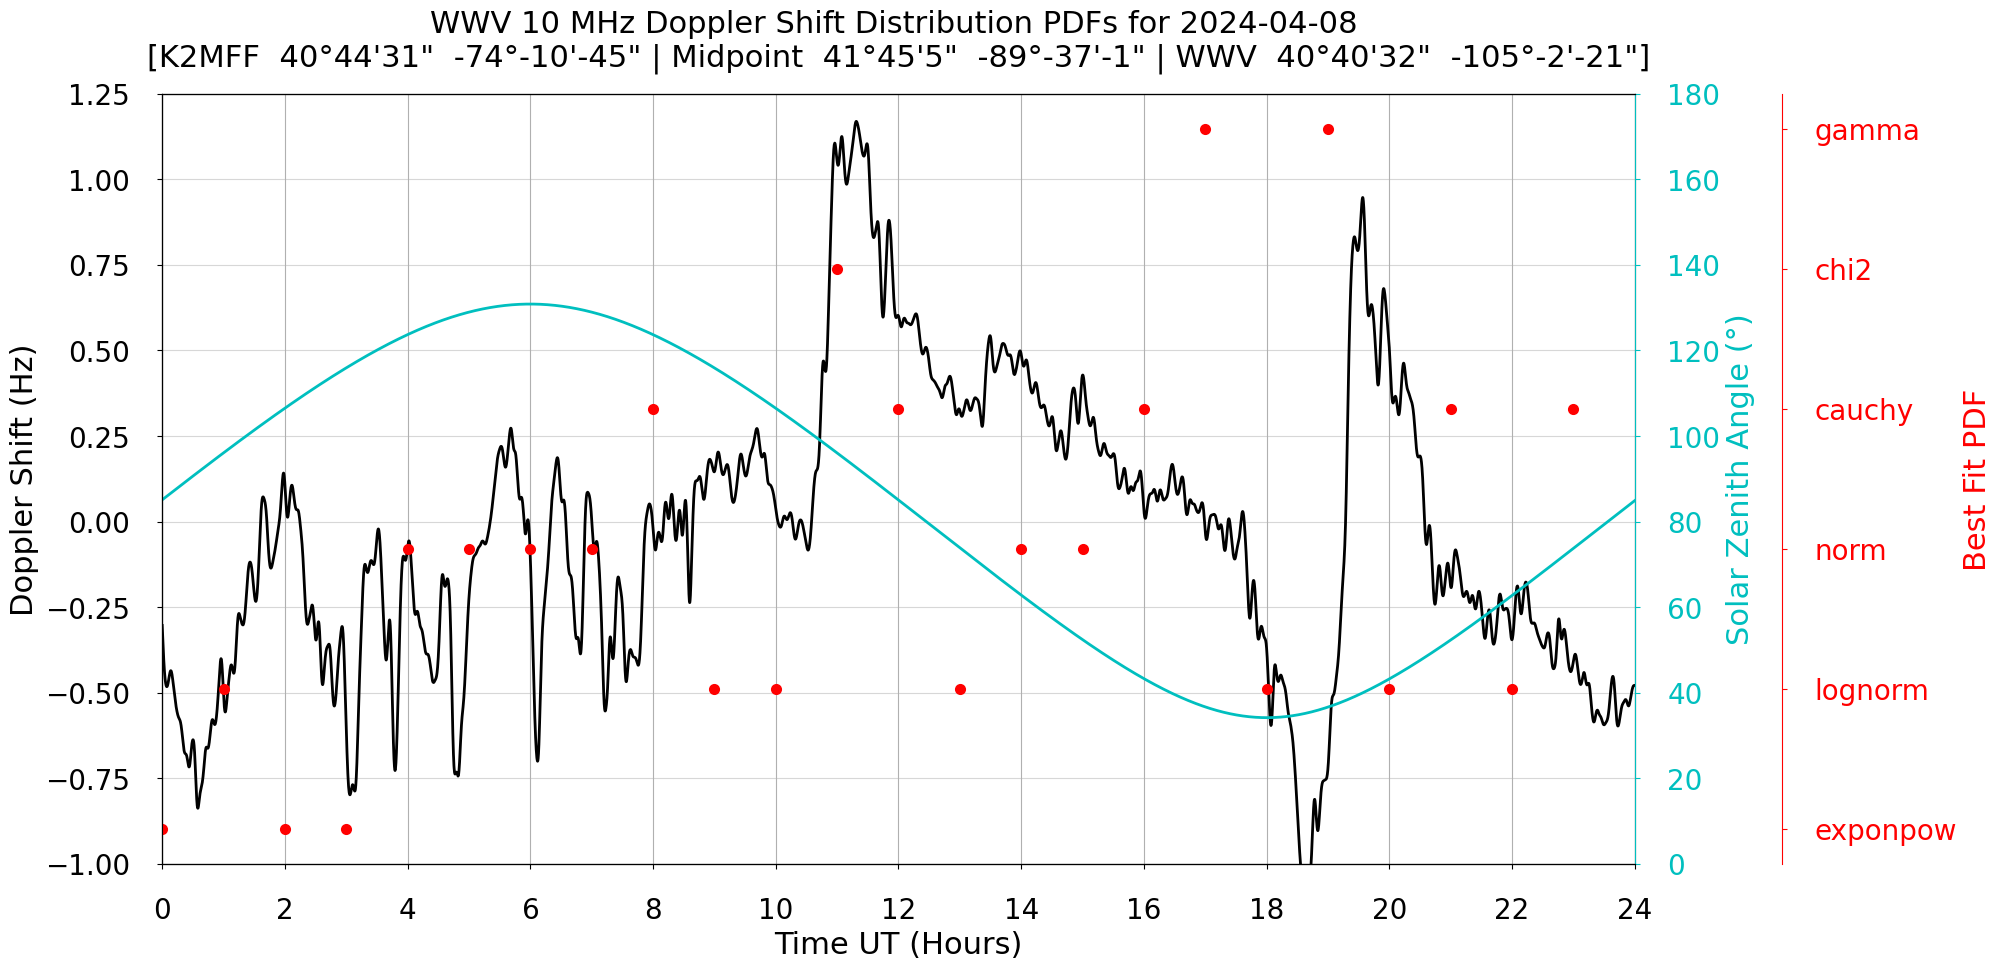

In [6]:
# Create Best Fits Plot

if True:
    figname = grape.figname(**kwargs)
    g.bestFitsPlot(valname, figname, **kwargs)


c:\Users\sabas\anaconda\envs\wwv\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


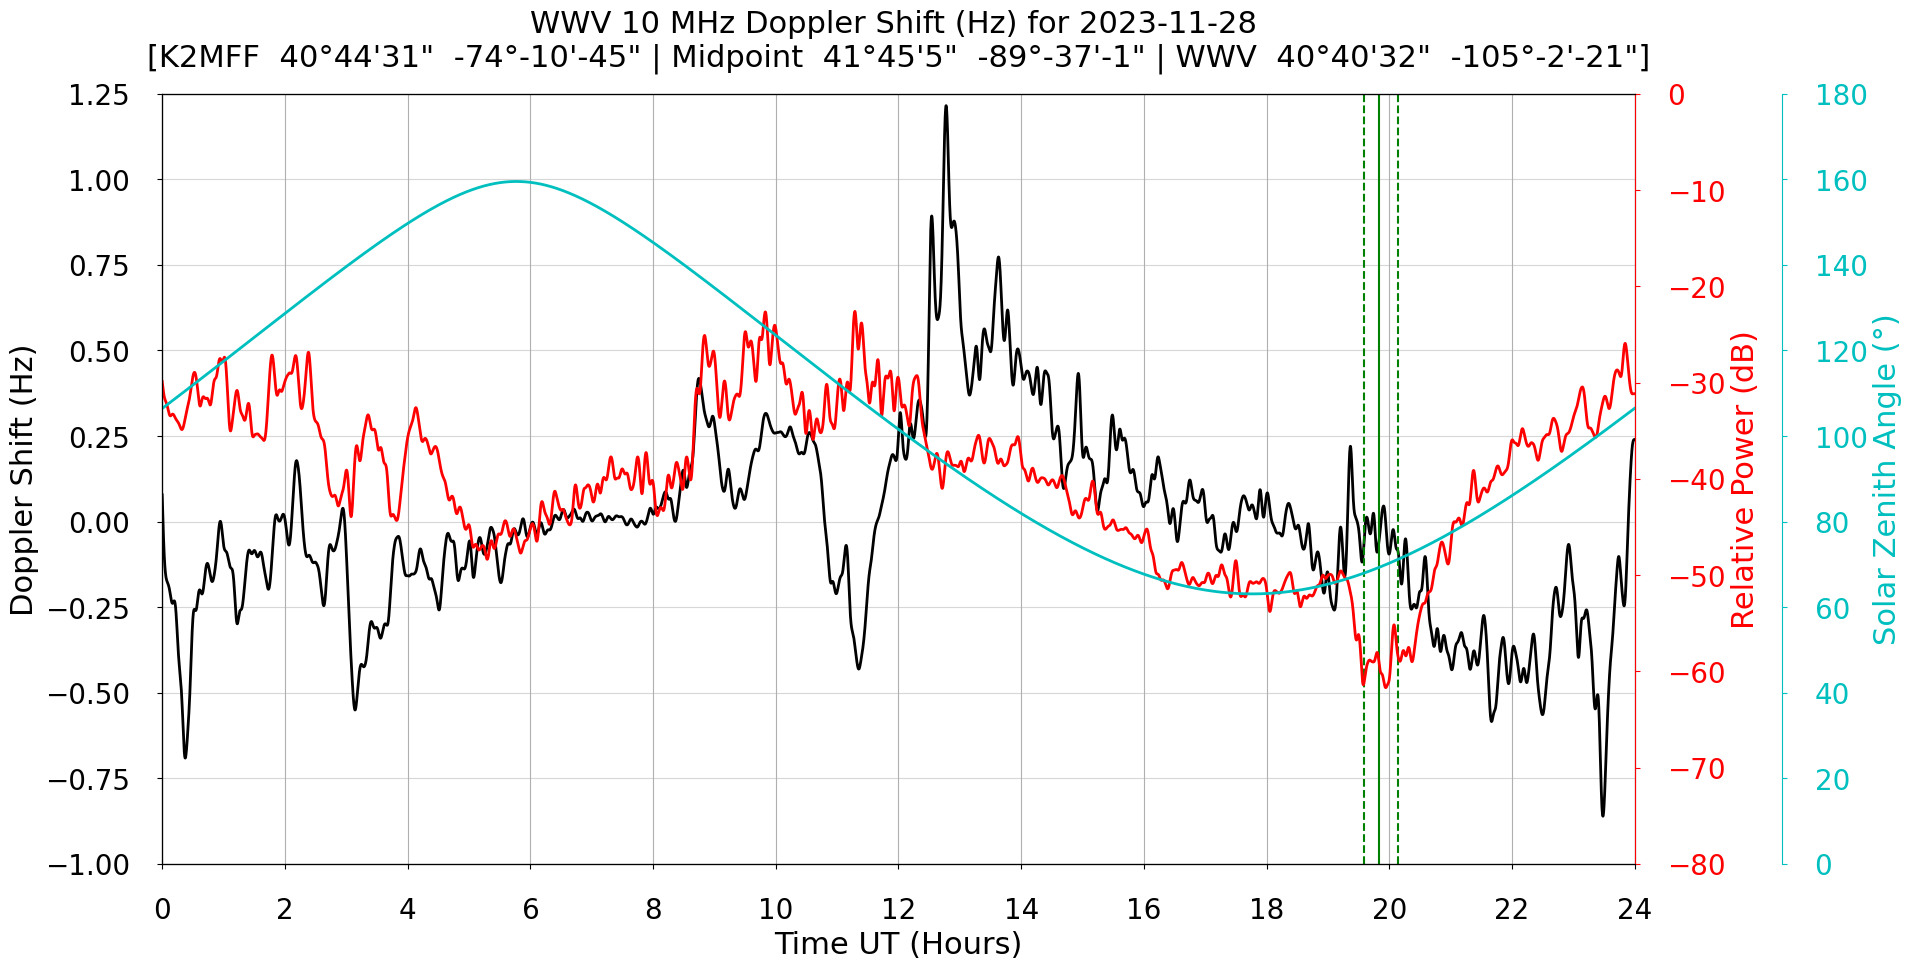

In [7]:
# Create Doppler Plot
import matplotlib.pyplot as plt

if False:
    figname = grape.figname(**kwargs)
    ax = g.dopPowPlot(figname, **kwargs)

    ax.axvline(x=19 + 35/60, color='g', linestyle='--', linewidth=1.5)
    ax.axvline(x=19 + 50/60, color='g', linestyle='-', linewidth=1.5)
    ax.axvline(x=20 + 9/60, color='g', linestyle='--', linewidth=1.5)

    plt.savefig('flare23_annotated' + '.png', bbox_inches='tight', dpi=300, orientation='landscape')
